In [ ]:
from scipy.io import loadmat
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
from scipy.special import expit, logit
import random
import matplotlib.pyplot as plt

In [ ]:
data = loadmat('data.mat')

In [ ]:
for i in data:
  print(i)

**Feature Normalization**

In [ ]:
x_data = data['X']
y_data = data['y']
cols = data['description']

In [ ]:
# KAGGLE SET

x_data = data['X']
df = pd.DataFrame(x_data, columns = cols)
df=(df - df.mean())/df.std()
new_d = [1] * 6000
df['new dim'] = new_d
t_df = df.transpose()
t_df

In [ ]:
df = pd.DataFrame(x_data, columns = cols)
df['y'] = y_data
np.random.seed(313)
df = df.sample(frac = 1, ignore_index = True)
df

In [ ]:
x_train = df.head(5000)
x_val = df.tail(1000)
x_train

In [ ]:
train_labels = np.reshape(np.array(x_train['y']), [5000, 1])
x_train = x_train.drop('y', axis = 1)

In [ ]:
norm_train=(x_train - x_train.mean())/x_train.std()
new_d = [1] * 5000
norm_train['new dim'] = new_d
norm_train

**Add fictitious dimension**

In [ ]:
nt = norm_train.transpose()
nt

**3.2: Batch Gradient Descent**

In [ ]:
def sigmoid(x):
  return expit(x)

In [ ]:
def cost(s, reg, w):
  w1 = np.array(w)
  y = train_labels
  new_y = np.reshape(y, [1, 5000])
  s = np.array(s)
  s = np.reshape(s, [5000, 1])
  diff_s = 1 - s
  diff_y = 1 - new_y
  return (np.dot((-1 * new_y), np.log(s)) - np.dot(diff_y, np.log(diff_s)) + reg * (np.linalg.norm(w1))**2)

In [ ]:
def BGD(w, s, X, y, ep, reg, delta):

  cost1 = np.inf
  
  counter = 0
  plot = []
  costs = []
  
  while counter < delta: 
    for i in range(len(s)):
      s[i] = sigmoid((np.dot(np.reshape(np.array(w), [1, 13]), np.reshape(np.array(nt[i]), [13, 1]))))
    cost1 = cost(s, reg, w)
    w = np.reshape(np.array(w), [13,1])
    w = w - (ep * (2 * reg * w - (np.dot(nt, (y - np.reshape(s, [5000, 1]))))))
    costs.append(cost1.flatten())
    counter += 1
    plot += [counter, cost1]
  return costs

In [ ]:
w = [0] * 13
s = [0] * 5000
for i in range(len(s)):
  s[i] = sigmoid((np.dot(w, np.array(nt[i]))))
X = nt
y = train_labels
ep = .001
reg = .01
delta = 5000

Text(0, 0.5, 'cost')

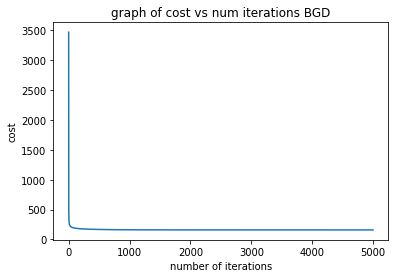

In [ ]:
y = BGD(w, s, nt, y, ep, reg, delta)
x = [i for i in range(0, delta)]

plt.plot(x, y, label = "validation")
plt.title("graph of cost vs num iterations BGD")
plt.xlabel("number of iterations")
plt.ylabel("cost")

**KAGGLE**

In [ ]:
def cost(s, reg, w):
  w1 = np.array(w)
  y = data['y']
  new_y = np.reshape(y, [1, 6000])
  s = np.array(s)
  s = np.reshape(s, [6000, 1])
  diff_s = 1 - s
  diff_y = 1 - new_y
  return (np.dot((-1 * new_y), np.log(s)) - np.dot(diff_y, np.log(diff_s)) + reg * (np.linalg.norm(w1))**2)

In [ ]:
def BGD(w, s, X, y, ep, reg, delta):

  cost1 = np.inf
  
  counter = 0
  plot = []
  costs = []
  
  while counter < delta: 
    for i in range(len(s)):
      s[i] = sigmoid((np.dot(np.reshape(np.array(w), [1, 13]), np.reshape(np.array(X[i]), [13, 1]))))
    cost1 = cost(s, reg, w)
    w = np.reshape(np.array(w), [13,1])
    w = w - (ep * (2 * reg * w - (np.dot(X, (y - np.reshape(s, [6000, 1]))))))
    costs.append(cost1.flatten())
    counter += 1
    plot += [counter, cost1]
  return w

In [ ]:
w = [0] * 13
s = [0] * 6000
for i in range(len(s)):
  s[i] = sigmoid((np.dot(w, np.array(t_df[i]))))
X = t_df
y = data['y']
ep = .001
reg = .01
delta = 5000

In [ ]:
weights = BGD(w, s, X, y, ep, reg, delta)
weights

**BGD Validation + Kaggle Submission**

In [ ]:
weights = BGD(w, s, nt, y, ep, reg, delta)
weights

In [ ]:
val_labels = np.array(x_val['y'])
val_labels

In [ ]:
#x_val
x_val = df.tail(1000)
x_val.reset_index()
val_labels = np.array(x_val['y'])
x_val = x_val.drop('y', axis = 1)
x_val = (x_val - x_train.mean())/x_train.std()
d = [1] * 1000
x_val['new dim'] = d
x_val

In [ ]:
val_t = x_val.transpose()
val_t

In [ ]:
wr = np.reshape(weights, [1, 13])
val_t[5000].shape

(13,)

In [ ]:
preds = [0] * 1000
wr = np.reshape(weights, [1, 13])
for i in range(5000, 6000):
  preds[i - 5000] = (np.rint(sigmoid(np.dot(wr, np.reshape(np.array(val_t[i]), [13, 1]))))).flatten()
preds

In [ ]:
correct = 0
for q in range(len(preds)):
  if preds[q] == val_labels[q]:
    correct += 1
print(correct)

1000


In [ ]:
x_test = data['X_test']
stuff = [0] * len(data['X_test'])
for i in range(len(x_test)):
  stuff[i] = np.append(x_test[i], 1)

In [ ]:
df_test = pd.DataFrame(x_test, columns = cols)
df_test = (df_test - df_test.mean())/df_test.std()
d = [1] * 497
df_test['new dim'] = d
df_test

In [ ]:
trans = df_test.transpose()
trans

In [ ]:
preddy = [0] * 497
wr = np.reshape(weights, [1, 13])
for i in range(497):
  preddy[i] = (np.rint(sigmoid(np.dot(wr, np.reshape(np.array(trans[i]), [13, 1]))))).flatten()

In [ ]:
pred_int = [0] * 497
for sd in range(len(preddy)):
  pred_int[sd] = int(preddy[sd])

In [ ]:
ls = [i for i in range(1, 498)]
pred = pd.DataFrame(pred_int,columns=['Category'])
pred['id'] = ls
pred.set_index('id', inplace = True)
pred.to_csv(f"okokok2.csv")

**3.4: SGD**

In [ ]:
def cost2(s, reg, w):
  w1 = np.array(w).T
  y = train_labels
  new_y = np.reshape(y, [1, 5000])
  s = np.array(s)
  s = np.reshape(s, [5000, 1])
  diff_s = 1 - s
  diff_y = 1 - new_y
  return (np.dot((-1 * new_y), np.log(s)) - np.dot(diff_y, np.log(diff_s)) + reg * (np.linalg.norm(w1))**2)

In [ ]:
def SGD(w, s, X, y, ep, reg, delta):

  cost1 = np.inf
  
  counter = 0
  plot = []
  costs = []
  
  while counter < delta: 
    for i in range(len(s)):
      s[i] = sigmoid((np.dot(np.reshape(np.array(w), [1, 13]), np.reshape(np.array(nt[i]), [13, 1]))))
    cost1 = cost2(s, reg, w)
    np.random.seed(313)
    index = random.randrange(5000)
    w = np.reshape(np.array(w), [1, 13])
    w = w - (ep * (2 * reg * w - (y[index] - s[index]) * np.array(nt[index])))
    costs.append(cost1.flatten())
    counter += 1
    plot += [counter, cost1]
  return costs

In [ ]:
w = [0] * 13
s = [0] * 5000
for i in range(len(s)):
  s[i] = sigmoid((np.dot(w, np.array(nt[i]))))
X = nt
y = train_labels
ep = .001
reg = .01
delta = 5000

Text(0, 0.5, 'cost')

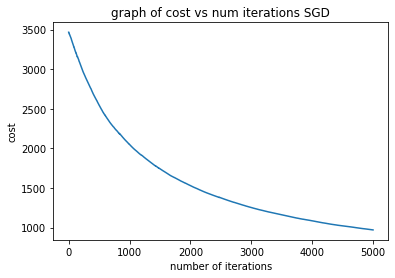

In [ ]:
y = SGD(w, s, nt, y, ep, reg, delta)
x = [i for i in range(0, delta)]
plt.plot(x, y, label = "validation")
plt.title("graph of cost vs num iterations SGD")
plt.xlabel("number of iterations")
plt.ylabel("cost")

**3.5: Shrinking Step Size**

In [ ]:
def SGD2(w, s, X, y, ep, reg, delta):

  cost1 = np.inf
  
  counter = 0
  plot = []
  costs = []
  
  while counter < delta:
    ep1 = ep/(counter + 1) 
    for i in range(len(s)):
      s[i] = sigmoid((np.dot(np.reshape(np.array(w), [1, 13]), np.reshape(np.array(nt[i]), [13, 1]))))
    cost1 = cost2(s, reg, w)
    np.random.seed(303)
    index = random.randrange(5000)
    w = np.reshape(np.array(w), [1, 13])
    w = w - (ep1 * (2 * reg * w - (y[index] - s[index]) * np.array(nt[index])))
    costs.append(cost1.flatten())
    counter += 1
    plot += [counter, cost1]
  return costs

In [ ]:
w = [0] * 13
s = [0] * 5000
for i in range(len(s)):
  s[i] = sigmoid((np.dot(w, np.array(nt[i]))))
X = nt
y = train_labels
ep = .001
reg = .01
delta = 5000

Text(0, 0.5, 'cost')

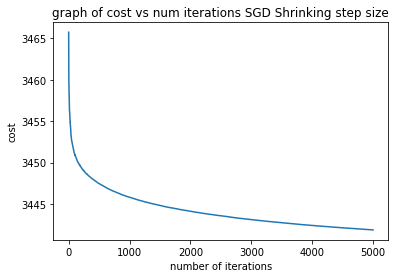

In [ ]:
y = SGD2(w, s, nt, y, ep, reg, delta)
x = [i for i in range(0, delta)]
plt.plot(x, y, label = "validation")
plt.title("graph of cost vs num iterations SGD Shrinking step size")
plt.xlabel("number of iterations")
plt.ylabel("cost")

**5.1: Isocountour Plots**

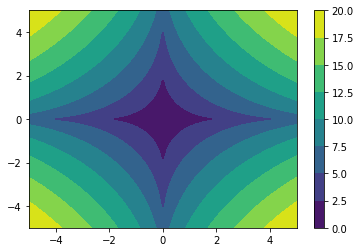

In [ ]:
x, y = np.meshgrid(np.linspace(-5.0, 5.0, 100), np.linspace(-5.0, 5.0, 100))
p = 0.5
z = (np.abs(x)**p + np.abs(y)**p)**(1/p)
fig,ax=plt.subplots(1,1)
a = ax.contourf(x, y, z)
fig.colorbar(a)
plt.show()

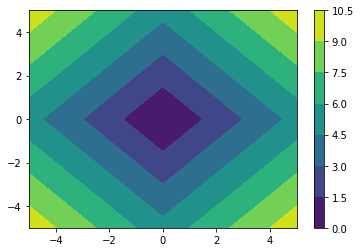

In [ ]:
x, y = np.meshgrid(np.linspace(-5.0, 5.0, 100), np.linspace(-5.0, 5.0, 100))
p = 1
z = (np.abs(x)**p + np.abs(y)**p)**(1/p)
fig,ax=plt.subplots(1,1)
a = ax.contourf(x, y, z)
fig.colorbar(a)
plt.show()

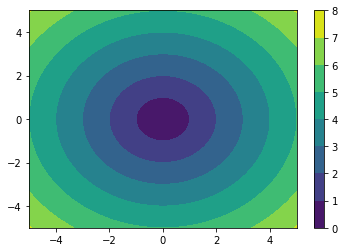

In [ ]:
x, y = np.meshgrid(np.linspace(-5.0, 5.0, 100), np.linspace(-5.0, 5.0, 100))
p = 2
z = (np.abs(x)**p + np.abs(y)**p)**(1/p)
fig,ax=plt.subplots(1,1)
a = ax.contourf(x, y, z)
fig.colorbar(a)
plt.show()